In [3]:
!pip install XGboost

     |████████████████████████████████| 297.1 MB 4.5 kB/s eta 0:00:01


In [34]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf




In [2]:
df = pd.read_csv('train.csv')
df

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality


In [3]:
# Remove URL
def remove_URL(text):
    url = re.compile(r'http\S+')
    return url.sub(r'',text)
df['Tweet'] = df['Tweet'].apply(lambda x : remove_URL(x))

In [4]:
# Remove html tags

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['Tweet']=df['Tweet'].apply(lambda x : remove_html(x))

In [5]:
# Remove mentions and hashtag

def remove_mention_hashtag(text):
    text=re.sub(r'@\w+','',text)        # remove mentions
    text=re.sub('[#]','',text)        # remove hashtag
    return text

df['Tweet']=df['Tweet'].apply(lambda x: remove_mention_hashtag(x))

In [6]:
# Remove Emails

def remove_emails(text):
  email = re.compile(r'\S*@\S*\s?')
  return email.sub(r'', text)

df['Tweet']=df['Tweet'].apply(lambda x : remove_emails(x))

In [7]:
# Remove new line characters

def remove_newline(text):
  newline = re.compile(r'\n+')
  return newline.sub(r'', text)

df['Tweet']=df['Tweet'].apply(lambda x : remove_newline(x))

In [8]:
# Remove extra white space left while removing stuff

def remove_space(text):
    whitespace_remove = re.compile(r'\s+')
    return whitespace_remove.sub(r' ', text)

df["Tweet"]=df["Tweet"].apply(lambda x: remove_space(x))
len(df)

11968

In [9]:
punct=string.punctuation+'”‘’“'

def clean_text(text):
#Make text lowercase
    text = text.lower()
#remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
#remove punctuation
    text = re.sub(r'[%s]' % re.escape(punct), '', text)
#remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df["Tweet"]=df["Tweet"].apply(lambda x: clean_text(x))


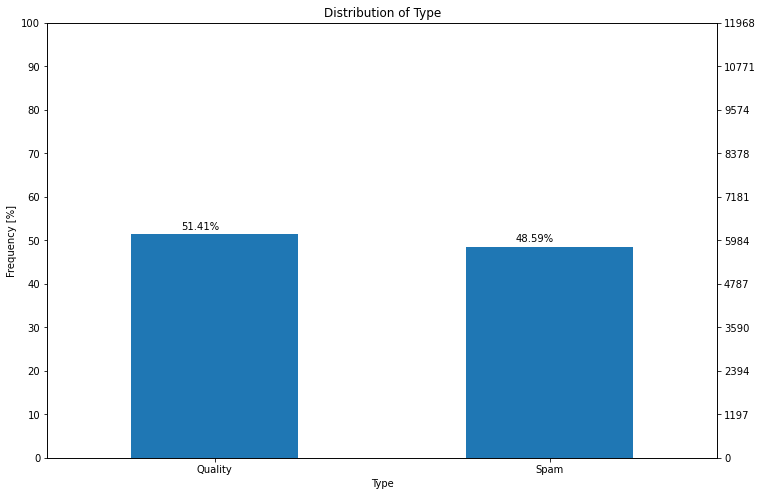

In [10]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Type')
plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

ax = (df.Type.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [11]:
df

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,its the everything else thats complicated pesu...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,eren sent a glare towards mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,i posted a new photo to facebook,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,jan idiot chelsea handler diagnoses trump with...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,pedophile anthony weiner is terrified of getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...,...
11963,7866,meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,if bbc food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,look what liberals did to this historic monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam
11966,6818,i uploaded a new track everyday lite on sprea...,0.0,0.0,0.0,0.0,Mega Manila,Quality


In [12]:
df_numerci = df.drop(['Tweet'],axis=1)

<AxesSubplot:>

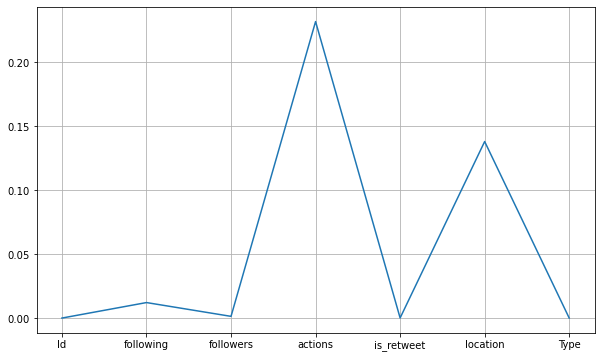

In [13]:
dfp = df_numerci.isnull().sum()/len(df_numerci)
dfp.plot(figsize = (10,6),grid = True)

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_numerci)
df_numerci = pd.DataFrame(imp.transform(df_numerci), columns=df_numerci.columns)
df_numerci

,Id,following,followers,actions,is_retweet,location,Type
0,10091,0.0,11500.0,0.0,0.0,Chicago,Quality
1,10172,0.0,0.0,0.0,0.0,United States,Quality
2,7012,0.0,0.0,0.0,0.0,"Scotland, U.K",Quality
3,3697,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...
11963,7866,0.0,0.0,0.0,0.0,United States,Quality
11964,7841,0.0,0.0,0.0,0.0,"London, N4",Quality
11965,9090,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam
11966,6818,0.0,0.0,0.0,0.0,Mega Manila,Quality


In [15]:
lable = LabelEncoder()
df_numerci['Type'] = lable.fit_transform(df_numerci['Type'])
df_numerci['location'] = lable.fit_transform(df_numerci['location'])

y = df_numerci['Type']
df_numerci

,Id,following,followers,actions,is_retweet,location,Type
0,10091,0.0,11500.0,0.0,0.0,508,0
1,10172,0.0,0.0,0.0,0.0,2196,0
2,7012,0.0,0.0,0.0,0.0,1883,0
3,3697,3319.0,611.0,294.0,0.0,248,1
4,10740,4840.0,1724.0,1522.0,0.0,357,1
...,...,...,...,...,...,...,...
11963,7866,0.0,0.0,0.0,0.0,2196,0
11964,7841,0.0,0.0,0.0,0.0,1240,0
11965,9090,0.0,2.0,1192.0,0.0,2518,1
11966,6818,0.0,0.0,0.0,0.0,1346,0


In [16]:
scaler = StandardScaler()
scaler.fit(df_numerci)
df_numerci = pd.DataFrame(scaler.transform(df_numerci), columns=df_numerci.columns)
df_numerci['Type'] = y
df_numerci


,Id,following,followers,actions,is_retweet,location,Type
0,1.045802,-0.150637,-0.089380,-0.380736,-0.537163,-1.600295,0
1,1.068101,-0.150637,-0.092277,-0.380736,-0.537163,0.664641,0
2,0.198143,-0.150637,-0.092277,-0.380736,-0.537163,0.244662,0
3,-0.714487,-0.044917,-0.092123,-0.360818,-0.537163,-1.949159,1
4,1.224473,0.003532,-0.091842,-0.277621,-0.537163,-1.802904,1
...,...,...,...,...,...,...,...
11963,0.433252,-0.150637,-0.092277,-0.380736,-0.537163,0.664641,0
11964,0.426369,-0.150637,-0.092277,-0.380736,-0.537163,-0.618107,0
11965,0.770223,-0.150637,-0.092276,-0.299979,-0.537163,1.096697,1
11966,0.144734,-0.150637,-0.092277,-0.380736,-0.537163,-0.475877,0


In [17]:
clf1 = DecisionTreeRegressor(random_state=42)
clf2 = XGBRegressor()
clf3 = RandomForestRegressor(random_state=42, n_jobs=-1)

estimators = [('DT1', clf1), ('xgb', clf2), ('RF', clf3)]
voting_clf = VotingRegressor(estimators=estimators)
voting_clf.fit(df_numerci.drop(['Type'],axis=1), df_numerci['Type'])
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """

    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_

    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores
featur_imp = pd.DataFrame()
featur_imp['Feature'] = df_numerci.drop(['Type'],axis=1).columns
featur_imp['Feature Importance'] = compute_feature_importance(voting_clf, [1, 1, 1])
featur_imp.sort_values('Feature Importance', ascending=False, inplace=True)
featur_imp

,Feature,Feature Importance
1,following,2.603711
3,actions,0.275562
2,followers,0.101877
0,Id,0.007908
5,location,0.006548
4,is_retweet,0.004395


/tmp/ipykernel_4783/3873430686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature Importance", y="Feature", data=featur_imp_head,palette='rocket', orient='h')


<AxesSubplot:xlabel='Feature Importance', ylabel='Feature'>

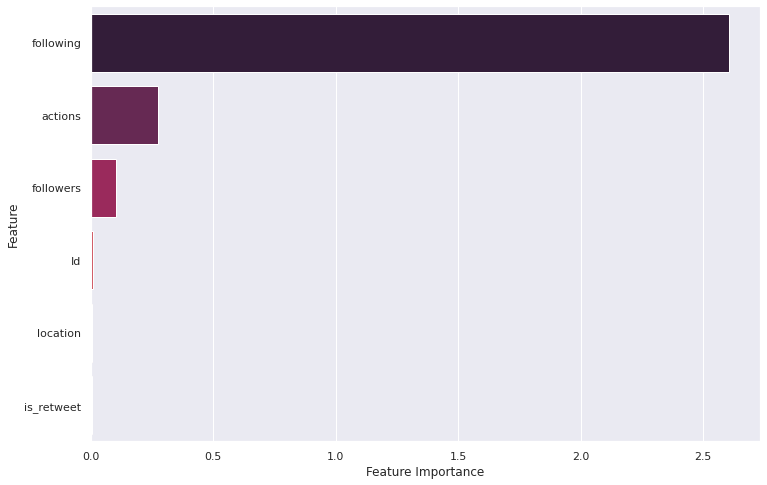

In [18]:
featur_imp_head = featur_imp[featur_imp['Feature Importance'] > 0.0]
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="Feature Importance", y="Feature", data=featur_imp_head,palette='rocket', orient='h')

In [19]:
col = featur_imp[featur_imp['Feature Importance'] > 0.01]
col = col['Feature'].to_list()
df_c = df_numerci[[c for c in df.columns if c in col]]
df_c

,following,followers,actions
0,-0.150637,-0.089380,-0.380736
1,-0.150637,-0.092277,-0.380736
2,-0.150637,-0.092277,-0.380736
3,-0.044917,-0.092123,-0.360818
4,0.003532,-0.091842,-0.277621
...,...,...,...
11963,-0.150637,-0.092277,-0.380736
11964,-0.150637,-0.092277,-0.380736
11965,-0.150637,-0.092276,-0.299979
11966,-0.150637,-0.092277,-0.380736


In [20]:
df_c['type'] = y
df_c['text'] = df['Tweet']
df_c

/tmp/ipykernel_4783/2319497618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['type'] = y
/tmp/ipykernel_4783/2319497618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['text'] = df['Tweet']


,following,followers,actions,type,text
0,-0.150637,-0.089380,-0.380736,0,its the everything else thats complicated pesu...
1,-0.150637,-0.092277,-0.380736,0,eren sent a glare towards mikasa then nodded a...
2,-0.150637,-0.092277,-0.380736,0,i posted a new photo to facebook
3,-0.044917,-0.092123,-0.360818,1,jan idiot chelsea handler diagnoses trump with...
4,0.003532,-0.091842,-0.277621,1,pedophile anthony weiner is terrified of getti...
...,...,...,...,...,...
11963,-0.150637,-0.092277,-0.380736,0,meet harry
11964,-0.150637,-0.092277,-0.380736,0,if bbc food disappears the loss of knowledge w...
11965,-0.150637,-0.092276,-0.299979,1,look what liberals did to this historic monume...
11966,-0.150637,-0.092277,-0.380736,0,i uploaded a new track everyday lite on sprea...


In [21]:
train_text = df_c['text']
WORD_NUM = 5000 #arbitrary choice, but commonly used vocab size when using word embeddings
tokenizer = Tokenizer(num_words = WORD_NUM,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower = True)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
dict(list(word_index.items())[:10])

{'the': 1,
 'to': 2,
 'in': 3,
 'a': 4,
 'of': 5,
 'for': 6,
 'and': 7,
 'you': 8,
 'i': 9,
 'is': 10}

In [22]:
train_seq = tokenizer.texts_to_sequences(train_text)
print(train_seq[1])

[1537, 4, 2285, 149, 7, 41, 2, 79, 145, 67, 1388, 2977, 571, 63, 2033, 3, 1]


In [23]:
p=[len(s) for s in train_seq]
max(p)
MAX_SEQUENCE_LENGTH = np.mean(p).astype(int) #abritrary choice
MAX_SEQUENCE_LENGTH

9

In [24]:
train_pad = pad_sequences(train_seq, maxlen= MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
print(train_pad.shape)

(11968, 9)


In [25]:
probs = np.random.rand(len(df_c))
training_mask = probs < 0.8
test_mask = (probs>=0.80) 
y_train=df_c['type'][training_mask]
y_test =df_c['type'][test_mask]

x_train_s=train_pad[training_mask]
x_test_s=train_pad[test_mask]

x_train_n=df_c.iloc[:,0:4][training_mask]
x_test_n =df_c.iloc[:,0:4][test_mask]

In [26]:
y_train

0        0
1        0
2        0
3        1
4        1
        ..
11962    1
11963    0
11964    0
11965    1
11967    1
Name: type, Length: 9639, dtype: int64

In [27]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras import layers
import keras
import os
from keras import ops

In [44]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [45]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [49]:
input1= keras.Input (shape= (9,),dtype=tf.int64)
input2 = keras.Input (shape=(4,),dtype=tf.float32)

In [57]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

x = TokenAndPositionEmbedding(9, 5000, embed_dim)(input2)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x= keras.layers.Concatenate()([x,input2])
x= keras.layers.Dense (16,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=[input1,input2], outputs=outputs)

model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_and_position… │ (None, 4, 32)     │    160,288 │ input_layer_17[0… │
│ (TokenAndPositionE… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ token_and_positi… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 36)        │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 16)        │        592 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 16)        │          0 │ dense_37[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 20)        │        340 │ dropout_38[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 20)        │          0 │ dense_38[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 1)         │         21 │ dropout_39[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 161,241 (629.85 KB)

 Trainable params: 161,241 (629.85 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit([x_train_s,x_train_n], y_train,epochs=20,batch_size=20
               ,validation_data=([x_test_s,x_test_n ],y_test))


Epoch 1/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.3935 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 2/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0612 - val_accuracy: 1.0000 - val_loss: 2.2462e-04
Epoch 3/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 3.8583e-05
Epoch 4/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 3.8741e-05
Epoch 5/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 2.7238e-06
Epoch 6/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 1.9271e-06
Epoch 7/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 3.9633e-07
Epoch 8/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0

In [54]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 1.0000
Testing Accuracy:  1.0000


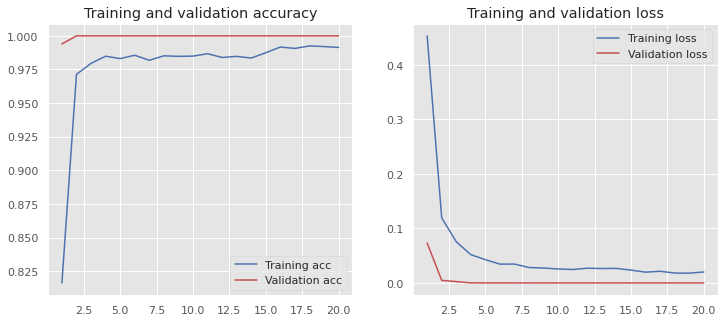

In [56]:
loss, accuracy = model.evaluate([x_train_s,x_train_n], y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss1, accuracy1 = model.evaluate([x_test_s,x_test_n ], y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy1))
plot_history(history)

In [59]:
df_test = pd.read_csv('train.csv')
df_test

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality


In [61]:
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_html(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_emails(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_mention_hashtag(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_newline(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_space(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : remove_space(x))
df_test['Tweet']=df_test['Tweet'].apply(lambda x : clean_text(x))

df_test_numerci = df_test.drop(['Tweet'],axis=1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_test_numerci)
df_test_numerci = pd.DataFrame(imp.transform(df_test_numerci), columns=df_test_numerci.columns)
df_test_numerci['Type'] = lable.fit_transform(df_test_numerci['Type'])
df_test_numerci['location'] = lable.fit_transform(df_test_numerci['location'])

y = df_test_numerci['Type']

df_test_c = df_test_numerci[[c for c in df_test.columns if c in col]]

df_test_c['type'] = y
df_test_c['text'] = df_test['Tweet']


/tmp/ipykernel_4783/1551196475.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_c['type'] = y
/tmp/ipykernel_4783/1551196475.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_c['text'] = df_test['Tweet']


In [63]:
train_text = df_test_c['text']
WORD_NUM = 5000 #arbitrary choice, but commonly used vocab size when using word embeddings
tokenizer = Tokenizer(num_words = WORD_NUM,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower = True)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
train_seq = tokenizer.texts_to_sequences(train_text)
train_pad = pad_sequences(train_seq, maxlen= MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

x_train_n=df_c.iloc[:,0:4]
x_test_n =df_c.iloc[:,0:4]


In [65]:
df_test_c

,following,followers,actions,type,text
0,0.0,11500.0,0.0,0,its the everything else thats complicated pesu...
1,0.0,0.0,0.0,0,eren sent a glare towards mikasa then nodded a...
2,0.0,0.0,0.0,0,i posted a new photo to facebook
3,3319.0,611.0,294.0,1,jan idiot chelsea handler diagnoses trump with...
4,4840.0,1724.0,1522.0,1,pedophile anthony weiner is terrified of getti...
...,...,...,...,...,...
11963,0.0,0.0,0.0,0,meet harry
11964,0.0,0.0,0.0,0,if bbc food disappears the loss of knowledge w...
11965,0.0,2.0,1192.0,1,look what liberals did to this historic monume...
11966,0.0,0.0,0.0,0,i uploaded a new track everyday lite on sprea...
